# Multi-label prediction with Planet Amazon dataset
---

In [0]:
import fastai
from fastai.vision import *

In [0]:
planet = untar_data(URLs.PLANET_TINY)

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_warp=0., max_zoom=1.05)

In [0]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [0]:
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/planet_tiny/train')]

In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use the defaults for conversion to databunch

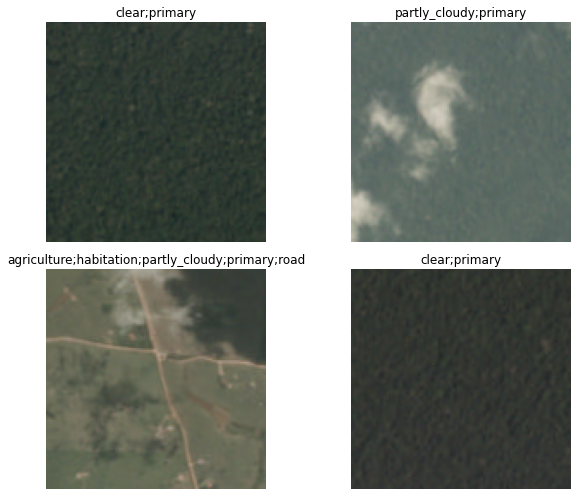

In [0]:
data.show_batch(rows=2, figsize=(9,7))

In [0]:
arch = models.resnet50

# The main changes to allow for multiclass classification
---
we cannot use accuracy as a metric as it use argmax to find the prediction and compare it against the true label, so instead we use accuracy threshold which takes threshold and compares them against the multiple labels recieved. 

The Fscore metric is generated byb modifing the Fbeta function which is built into fastAI

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


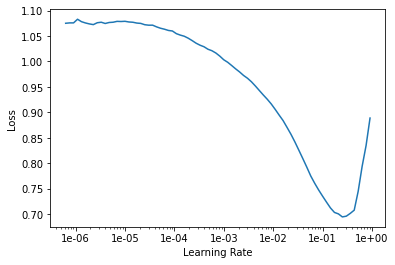

In [0]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [0]:
learn.fit_one_cycle(100, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.044956,0.322854,0.905357,0.785074,00:01
1,0.042176,0.320147,0.903571,0.784032,00:01
2,0.043947,0.318078,0.903571,0.792365,00:01
3,0.043402,0.323791,0.903571,0.792365,00:01
4,0.043221,0.327725,0.898214,0.779847,00:01
5,0.042377,0.329542,0.900000,0.781038,00:01
6,0.039990,0.326024,0.898214,0.763046,00:01
7,0.039856,0.327185,0.898214,0.775266,00:01
8,0.039814,0.325768,0.901786,0.786630,00:01
9,0.039395,0.324563,0.896429,0.770633,00:01


KeyboardInterrupt: ignored

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [0]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'clear',
 'cloudy',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'water']

In [0]:
data.c

14

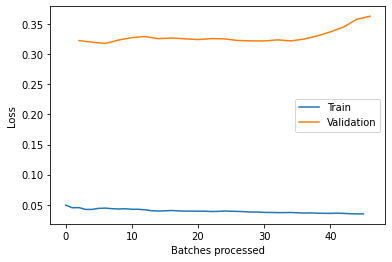

In [0]:
learn.recorder.plot_losses()

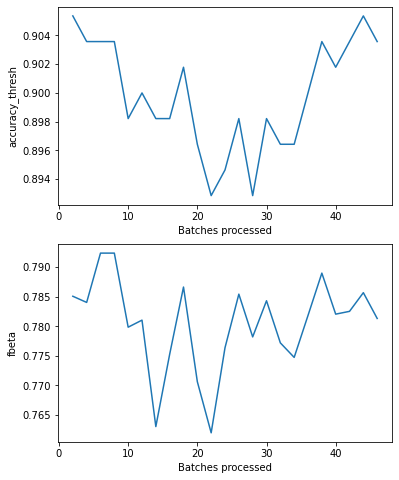

In [0]:
learn.recorder.plot_metrics()